# 9.60 Data Evaluation #


In [1357]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats 

In [1358]:
cleanimages = ["4063.png", "6948.png", "8050.png", "6859.png", "8311.png", "2990.png", "7187.png", "9247.png", "5295.png", "6710.png", "6598.png", "2817.png", "9558.png", "3318.png", "6030.png"]
cleanimage_filepath = "\clean_dataset\images"
overall_accuracies = {}
human_accuracies = {}
model_accuracies = {}

In [1359]:
def get_labels(item):
    map = {
        "0-2": 0,
        "3-9": 1,
        "10-19": 2,
        "20-29": 3, 
        "30-39": 4,
        "40-49": 5,
        "50-59": 6,
        "60+": 7
    }
    return map[item]

In [1360]:
df = pd.read_csv("9.60 Age Detection Experiment (Responses) - Form Responses 1.csv")
df

,Timestamp,(Example) Give your best estimate of the individual's age.,Do you consent for your responses to be used in our analysis?,Give your best estimate of the individual's age.,Give your best estimate of the individual's age..1,Give your best estimate of the individual's age..2,Give your best estimate of the individual's age..3,Give your best estimate of the individual's age..4,Give your best estimate of the individual's age..5,Give your best estimate of the individual's age..6,...,Give your best estimate of the individual's age..27,Give your best estimate of the individual's age..28,Give your best estimate of the individual's age..29,Give your best estimate of the individual's age..30,Give your best estimate of the individual's age..31,Give your best estimate of the individual's age..32,Give your best estimate of the individual's age..33,Give your best estimate of the individual's age..34,Give your best estimate of the individual's age..35,Feedback/Problems
0,4/29/2024 18:21:25,40-49,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,50-59,0-2,40-49,60+,60+,50-59,0-2,10-19,NaN,NaN
1,4/29/2024 18:25:33,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,50-59,0-2,30-39,50-59,60+,50-59,0-2,10-19,NaN,NaN
2,4/29/2024 18:30:36,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,60+,0-2,40-49,60+,60+,50-59,0-2,10-19,NaN,NaN
3,4/29/2024 18:30:38,30-39,Yes,60+,50-59,0-2,0-2,60+,3-9,60+,...,50-59,0-2,20-29,50-59,60+,50-59,0-2,10-19,NaN,NaN
4,4/29/2024 18:32:46,30-39,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,50-59,0-2,20-29,60+,60+,50-59,0-2,10-19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4/29/2024 21:03:18,20-29,Yes,60+,30-39,0-2,3-9,60+,3-9,60+,...,50-59,0-2,20-29,50-59,50-59,40-49,0-2,10-19,NaN,NaN
110,4/29/2024 21:03:22,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,60+,0-2,20-29,60+,60+,50-59,0-2,10-19,NaN,"Dear Simon Opsahl, As a member of the communit..."
111,4/29/2024 21:06:45,20-29,Yes,60+,40-49,0-2,3-9,60+,10-19,60+,...,40-49,0-2,20-29,30-39,50-59,50-59,0-2,10-19,NaN,NaN
112,4/29/2024 21:24:39,20-29,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,60+,0-2,20-29,50-59,50-59,50-59,0-2,10-19,30-39,NaN


In [1361]:
cleanimagehumanresults = df.iloc[0:, 3:3+15]
cleanimagehumanresults.columns = cleanimages
cleanimagehumanresults

,4063.png,6948.png,8050.png,6859.png,8311.png,2990.png,7187.png,9247.png,5295.png,6710.png,6598.png,2817.png,9558.png,3318.png,6030.png
0,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,40-49,40-49,60+,40-49,50-59
1,60+,40-49,0-2,3-9,60+,3-9,60+,20-29,0-2,3-9,40-49,40-49,60+,40-49,60+
2,60+,40-49,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,30-39,20-29,50-59,50-59,60+
3,60+,50-59,0-2,0-2,60+,3-9,60+,30-39,0-2,0-2,30-39,40-49,60+,40-49,60+
4,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,50-59,40-49,60+,40-49,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,60+,30-39,0-2,3-9,60+,3-9,60+,20-29,0-2,3-9,20-29,30-39,50-59,30-39,50-59
110,60+,40-49,0-2,3-9,60+,3-9,60+,50-59,0-2,3-9,20-29,30-39,60+,40-49,60+
111,60+,40-49,0-2,3-9,60+,10-19,60+,30-39,0-2,3-9,30-39,30-39,50-59,40-49,50-59
112,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,30-39,30-39,50-59,30-39,60+


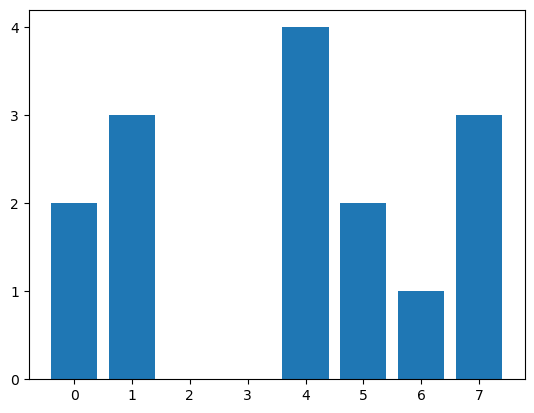

In [1362]:
labels = pd.read_csv('datasets/labels.csv')
cleanCategories = {f"{i}":[] for i in range(8)}
cleanCategories
for cleanimage in cleanimages:
    label = labels.loc[labels['image_name'] == cleanimage]["class_label"].item()
    if label == 8:
        cleanCategories["7"].append(cleanimage)
    else:
        cleanCategories[str(label)].append(cleanimage)
cleanCategories
lists = sorted(cleanCategories.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, [len(y1) for y1 in y])
plt.yticks([0, 1, 2, 3, 4])
plt.show()
# plt.plot(cleanCategories.keys(), cleanCategories)

In [1363]:
labels = pd.read_csv('datasets/labels.csv')
cleanimagehumanresultsnew = cleanimagehumanresults.applymap(get_labels)
for column in cleanimagehumanresultsnew:
    label = (labels.loc[labels['image_name'] == column]["class_label"].item())
    if label == 8:
        label = 7 # accounts for different ranges
    cleanimagehumanresultsnew[column] = cleanimagehumanresultsnew[column].apply(lambda x: x == label)
bruh = dict(cleanimagehumanresultsnew.mean())
pairings = {i:[[], 0] for i in range(8)}
for test in bruh:
    label = (labels.loc[labels['image_name'] == test]["class_label"].item())
    if label == 8:
        label = 7
    pairings[label][0].append(bruh[test])
    pairings[label][1] += 1
human_clean_pairing = [(label, np.mean(pairings[label][0])) for label in pairings]
print(human_clean_pairing)
overall_accuracies['Human-Clean'] = (cleanimagehumanresultsnew.mean().mean(), cleanimagehumanresultsnew.std().mean(), 114*15)
human_accuracies['Human-Clean'] = (cleanimagehumanresultsnew.mean().mean(), cleanimagehumanresultsnew.std().mean(), 114*15)


[(0, 0.956140350877193), (1, 0.8654970760233919), (2, nan), (3, nan), (4, 0.3442982456140351), (5, 0.19298245614035087), (6, 0.5), (7, 0.9093567251461988)]


/opt/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [1364]:
import requests
from PIL import Image
from io import BytesIO

from transformers import ViTFeatureExtractor, ViTForImageClassification

# Get example image from official fairface repo + read it in as an image
r = requests.get('https://github.com/dchen236/FairFace/blob/master/detected_faces/race_Asian_face0.jpg?raw=true')
im = Image.open(BytesIO(r.content))

# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

# Transform our image and pass it through the model
inputs = transforms(im, return_tensors='pt')
output = model(**inputs)

# Predicted Class probabilities
proba = output.logits.softmax(1)

# Predicted Classes
preds = proba.argmax(1)

In [192]:
df = pd.read_csv("data/Model Data/results_clean.csv")
df['class_label'] = df['class_label'].replace(8, 7)
average_accuracy_clean = list(enumerate(df.groupby('class_label')['accuracy'].mean()))
overall_accuracies["ViT-Clean"] = (df['accuracy'].mean(), df['accuracy'].std(), 100)
model_accuracies["ViT-Clean"] = (df['accuracy'].mean(), df['accuracy'].std(), 100)
print(average_accuracy_clean)


[(0, 1.0), (1, 0.8888888888888888), (2, 1.0), (3, 0.46153846153846156), (4, 0.42857142857142855), (5, 0.25), (6, 0.6666666666666666), (7, 0.5)]


In [1365]:
DFS = []
filter_accuracies_vit = []
for filter, files, n in [("Color Shift", [1, 2, 3, 4, 5, 6, 7, 8, 9], 450), ("Rotation", [11, 12], 100), ("Blur", [10], 50)]:
    dfs = []
    for file in files:
        df = pd.read_csv(f"data/Model Data/results_filter {file}.csv")
        df['class_label'] = df['class_label'].replace(8, 7)
        dfs.append(df)
    dfs = pd.concat(dfs)
    filter_accuracies_vit.append((filter, list(enumerate(dfs.groupby('class_label')['accuracy'].mean()))))
    overall_accuracies[f'ViT-{filter}'] = (dfs['accuracy'].mean(), dfs['accuracy'].std(), n)
    model_accuracies[f'ViT-{filter}'] = (dfs['accuracy'].mean(), dfs['accuracy'].std(), n)
    DFS.append(dfs)
DFS = pd.concat(DFS)
overall_accuracies["ViT-Perturbed"] = (DFS['accuracy'].mean(), DFS['accuracy'].std(), 600)
model_accuracies["ViT-Perturbed"] = (DFS['accuracy'].mean(), DFS['accuracy'].std(), 600)

average_accuracy_dirty = list(enumerate(DFS.groupby('class_label')['accuracy'].mean()))
print(filter_accuracies_vit)
print(overall_accuracies)

[('Color Shift', [(0, 0.7931034482758621), (1, 0.6808510638297872), (2, 0.9423076923076923), (3, 0.6506024096385542), (4, 0.32608695652173914), (5, 0.14516129032258066), (6, 0.44642857142857145), (7, 0.4666666666666667)]), ('Rotation', [(0, 0.7272727272727273), (1, 0.5454545454545454), (2, 0.75), (3, 0.28), (4, 0.2857142857142857), (5, 0.3333333333333333), (6, 0.8333333333333334), (7, 0.4)]), ('Blur', [(0, 0.75), (1, 0.5), (2, 0.8), (3, 0.625), (4, 0.2222222222222222), (5, 0.0), (6, 0.6666666666666666), (7, 0.6)])]
{'Human-Clean': (0.6333333333333332, 0.3381239093240821, 1710), 'ViT-Clean': (0.62, 0.49031435147801467, 100), 'ViT-Color Shift': (0.5590200445434298, 0.4970582407390558, 450), 'ViT-Rotation': (0.42, 0.49604496374885826, 100), 'ViT-Blur': (0.54, 0.5034574339058885, 50), 'ViT-Perturbed': (0.5342237061769616, 0.499244268373676, 600)}


In [1366]:
df = pd.read_csv("9.60 Age Detection Experiment (Responses) - Form Responses 1.csv")

shiftedimagehumanresults = ("Color Shift", df.iloc[0:, 18:18+5], [4645, 6153, 51, 8814, 1150])
rotatedimagehumanresults = ("Rotation", df.iloc[0:, 23:33], [4450, 3520, 2309, 3367, 371, 4645, 3589, 2012, 1148, 8814])
blurredimagehumanresults = ("Blur", df.iloc[0:, 33:38], [912, 1038, 4781, 4746, 6153])
labels_df = pd.read_csv("datasets/labels 2.csv")
dfs = []
for item in [shiftedimagehumanresults, rotatedimagehumanresults, blurredimagehumanresults]:
    (title, df, images) = item
    df.columns = [f'{image}.png' for image in images]
    df = df.applymap(get_labels)
    columns = []
    for column in df:
        label = (labels_df.loc[labels_df['image_name'] == column]["class_label"].item())
        if label == 8:
            label = 7 # accounts for different ranges
        df[column] = df[column].apply(lambda x: x == label)
    overall_accuracies[f'Human-{title}'] = (df.mean().mean(), df.std().mean(), 114*len(images))
    human_accuracies[f'Human-{title}'] = (df.mean().mean(), df.std().mean(), 114*len(images))

    dfs.append((df.mean(),df.std()))
means = pd.concat([a[0] for a in dfs])
overall_accuracies["Human-Perturbed"] = (means.mean(), pd.concat([a[1] for a in dfs]).mean(), 114 * 20)
human_accuracies["Human-Perturbed"] = (means.mean(), pd.concat([a[1] for a in dfs]).mean(), 114 * 20)

pairings = {i:[] for i in range(8)}
for title, mean in zip(means.keys(), means):
    label = (labels_df.loc[labels_df['image_name'] == title]["class_label"].item())
    if label == 8:
        label = 7
    pairings[label].append(mean)
human_dirty_pairing = [(label, np.mean(pairings[label])) for label in pairings]
print(human_dirty_pairing)


[(0, 0.9736842105263157), (1, 0.9035087719298246), (2, 0.9429824561403508), (3, 0.5321637426900584), (4, 0.3684210526315789), (5, 0.3114035087719298), (6, 0.35964912280701755), (7, 0.27192982456140347)]


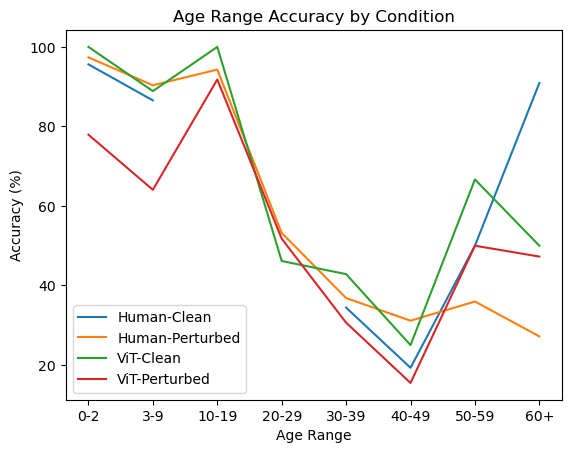

In [1367]:
fig, ax = plt.subplots()

ax.plot([pair[0] for pair in human_clean_pairing], [100*pair[1] for pair in human_clean_pairing], label = "Human-Clean")
ax.plot([pair[0] for pair in human_dirty_pairing], [100*pair[1] for pair in human_dirty_pairing], label = "Human-Perturbed")

ax.plot([pair[0] for pair in average_accuracy_clean], [100*pair[1] for pair in average_accuracy_clean], label = "ViT-Clean")
ax.plot([pair[0] for pair in average_accuracy_dirty], [100*pair[1] for pair in average_accuracy_dirty], label = "ViT-Perturbed")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60+"])
ax.set_xlabel("Age Range")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Age Range Accuracy by Condition")
ax.legend()

plt.show()

In [1368]:
# # Assuming you have defined pairing and average_accuracy_clean properly

# # fig, ax = plt.subplots()

# # Calculate mean accuracies
# human_mean_accuracy = np.mean([100*pair[1] for pair in pairing])

 

# # Plot the bar plot
# plt.bar(overall_accuracies.keys(), [100*v[0] for v in overall_accuracies.values()])
# plt.bar(["Human-Clean"], [human_mean_accuracy], color = "green")
# plt.x
# # Set labels and title
# plt.ylabel("Accuracy (%)")
# plt.title("Human Performance vs ViT")

# plt.show()


In [1369]:

# Extract accuracies, stds, and n
accuracies = [100*v[0] for v in overall_accuracies.values()]
stds = [100*v[1] for v in overall_accuracies.values()]
n = [v[2] for v in overall_accuracies.values()]

ses =[]
# Perform t-test for comparing each pair of conditions
for i in range(len(accuracies)):
    ses.append(stds[i]/ np.sqrt(n[i]))
    for j in range(i + 1, len(accuracies)):
        acc_diff = accuracies[i] - accuracies[j]
        std_pool = ((n[i] - 1) * stds[i] ** 2 + (n[j] - 1) * stds[j] ** 2) / (n[i] + n[j] - 2)
        se = (std_pool * (1 / n[i] + 1 / n[j])) ** 0.5
        t_stat = acc_diff / se
        df = n[i] + n[j] - 2
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
        print(f"Comparison between {list(overall_accuracies.keys())[i]} and {list(overall_accuracies.keys())[j]}:")
        print(f"t-statistic: {t_stat}, p-value: {p_value}")


# # Plotting
# plt.bar(range(len(overall_accuracies)), [100*v[0] for v in overall_accuracies.values()], yerr=[100*v[1]/np.sqrt(v[2]) for v in overall_accuracies.values()], capsize=5)
# plt.xticks(ticks=range(len(overall_accuracies)), labels=overall_accuracies.keys(), rotation=45)  # Change rotation angle here
# plt.ylabel('Accuracy (%)')
# plt.title('Accuracy Comparison')
# plt.tight_layout()
# plt.show()

Comparison between Human-Clean and ViT-Clean:
t-statistic: 0.37221145651980997, p-value: 0.7097790385780014
Comparison between Human-Clean and ViT-Color Shift:
t-statistic: 3.7229098755610246, p-value: 0.0002019836552840104
Comparison between Human-Clean and ViT-Rotation:
t-statistic: 5.947795667672824, p-value: 3.25506710474599e-09
Comparison between Human-Clean and ViT-Blur:
t-statistic: 1.8920983786999224, p-value: 0.05864206155676377
Comparison between Human-Clean and ViT-Perturbed:
t-statistic: 5.404941267077307, p-value: 7.149560699026836e-08
Comparison between Human-Clean and Human-Color Shift:
t-statistic: -2.1491517583365223, p-value: 0.03172743249639387
Comparison between Human-Clean and Human-Rotation:
t-statistic: 14.288761064450789, p-value: 0.0
Comparison between Human-Clean and Human-Blur:
t-statistic: -1.1475097285251037, p-value: 0.25129151315549025
Comparison between Human-Clean and Human-Perturbed:
t-statistic: 7.296514173689065, p-value: 3.5438318946034997e-13
Compa

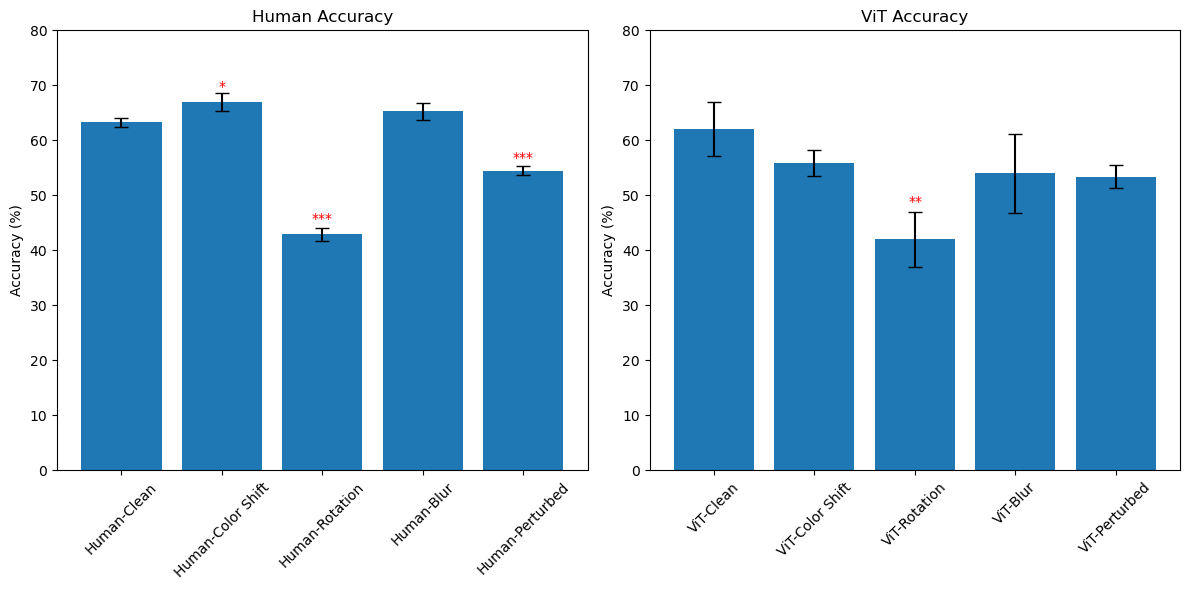

In [1370]:
# Extract accuracies, stds, and n
accuracies_human = [100*v[0] for v in human_accuracies.values()]
ses_human =[100*v[1]/np.sqrt(v[2]) for v in human_accuracies.values()]
accuracies_model = [100*v[0] for v in model_accuracies.values()]
ses_model =[100*v[1]/np.sqrt(v[2]) for v in model_accuracies.values()]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot human results
ax1.bar(range(len(accuracies_human)), accuracies_human, yerr=ses_human, capsize=5)
ax1.set_xticks(ticks=range(len(accuracies_human)), labels=human_accuracies.keys(), rotation=45)  # Change rotation angle here
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Human Accuracy')
ax1.text(1.89, 45, "***", color = 'red')
ax1.text(0.97, 69, "*", color = 'red')
ax1.text(3.89, 56, "***", color = 'red')
ax1.set_ylim(0, 80)

# Plot model results
ax2.bar(range(len(accuracies_model)), accuracies_model, yerr=ses_model, capsize=5)
ax2.set_xticks(ticks=range(len(accuracies_model)), labels=model_accuracies.keys(), rotation=45)  # Change rotation angle here
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('ViT Accuracy')
ax2.text(1.94, 48, "**", color = 'red')
ax2.set_ylim(0, 80)
plt.tight_layout()
plt.show()


Significant difference between Human-Clean and Human-Perturbed
Significant difference between Human-Clean and ViT-Perturbed


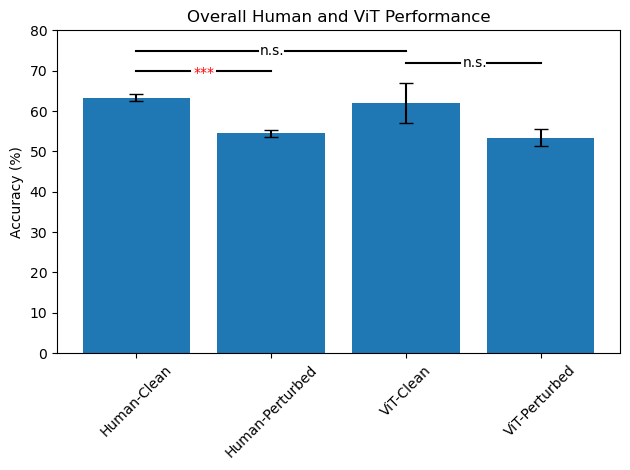

In [1371]:
overall_accuracies = {item: overall_accuracies[item] for item in ["Human-Clean", "Human-Perturbed", "ViT-Clean", "ViT-Perturbed"]}
# Extract accuracies, stds, and n
accuracies = [v[0] for v in overall_accuracies.values()]
stds = [v[1] for v in overall_accuracies.values()]
n = [v[2] for v in overall_accuracies.values()]

# Calculate standard errors
ses = [std / np.sqrt(n_val) for std, n_val in zip(stds, n)]

# Perform t-test for comparing each pair of conditions
for i in range(len(accuracies)):
    for j in range(i + 1, len(accuracies)):
        acc_diff = accuracies[i] - accuracies[j]
        std_pool = ((n[i] - 1) * stds[i] ** 2 + (n[j] - 1) * stds[j] ** 2) / (n[i] + n[j] - 2)
        se = (std_pool * (1 / n[i] + 1 / n[j])) ** 0.5
        t_stat = acc_diff / se
        df = n[i] + n[j] - 2
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
        if p_value < 0.05:
            print(f"Significant difference between {list(overall_accuracies.keys())[i]} and {list(overall_accuracies.keys())[j]}")

# Plotting
plt.bar(range(len(overall_accuracies)), [100 * v[0] for v in overall_accuracies.values()], 
        yerr=[100 * v / np.sqrt(n_val) for v, n_val in zip(stds, n)], capsize=5)

# significance for human-human
plt.plot([0, 0.40], [70, 70], color = 'Black')
plt.plot([0.6, 1], [70, 70], color = 'Black')
plt.text(0.425, 68.5, "***", color = "red")
# significance for vit-vit
plt.plot([2, 2.40], [72, 72], color = 'Black')
plt.plot([2.6, 3], [72, 72], color = 'Black')
plt.text(2.425, 71, "n.s.", color = "black")
# significance for human-vit
plt.plot([0, 0.9], [75, 75], color = 'Black')
plt.plot([1.1, 2], [75, 75], color = 'Black')
plt.text(0.917, 74, "n.s.", color = "black")


plt.xticks(ticks=range(len(overall_accuracies)), labels=overall_accuracies.keys(), rotation=45)
plt.ylabel('Accuracy (%)')
plt.ylim(0, 80)
plt.title('Overall Human and ViT Performance')
plt.tight_layout()